In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.__version__

'0.0.26'

In [3]:
os.getcwd()

'/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/notebooks'

In [4]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [5]:
adata = sc.read_h5ad('sanger/rawGexData_noDoublets_11covidPosAdults_sanger.h5ad')
adata

AnnData object with n_obs × n_vars = 90452 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'matched_NB_sample', 'barcode', 'status', 'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0', 'cluster1', 'cluster2', 'cluster3', 'patient_id', 'ID', 'Lab.ID', 'Male.Female', 'Age', 'Ethnicity', 'BMI', 'Hospitalised', 'Covid.19.positive.or.negative', 'If.COVID.19...Interval.between.first.symptoms.and.hospitalisation..days.', 'If.COVID.19...Interval.between.first.symptoms.and.sample.collection', 'If.COVID.19...Interval.between.COVID.19.positive.test.and.sample.collection', 'If.COVID.19...date.of.first.symptoms.dd.mm.yyyy', 'Date.of.admission.to.hospital.dd.mm.yyyy', 'Date.of.Covid.19.positive.test.dd.mm.yyyy', 'Reason.s..for.admission.to.hospital', 'Vasoactive.reagents.required.during.hospitalisation.', 'Viral.PCR.done..yes.no', 'If.covid.ve..disease.classification..WHO.', 'Severity.Classifcation', 'Type.of.symptoms', 'Smoker.non.smoker', 'If.ex.smoker..Y

In [6]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,matched_NB_sample,barcode,status,assignment,log_prob_singleton,log_prob_doublet,...,What.stage.,Collection.date,pANN,DF.classifications,doubletFinder_params,newBarcode,completeClust_predicted.id,initialClust_predicted.id,predicted_hi,predicted_lo
S9_AAACCTGAGATCTGAA-1,CV001_KM9294103-CV001_KM9294119,4227.0,1844,1.902729,CV001_KM8854562,AAACCTGAGATCTGAA-1,singlet,0,-254.926417,-389.336243,...,N/A,12/06/2020,0.261351,Singlet,pK0.14;pN0.25;nExp637;5%,S9_AAACCTGAGATCTGAA-1,B_cell_1,B_cell_1,B cells,B cells
S9_AAACCTGAGATGTGGC-1,CV001_KM9294103-CV001_KM9294119,4192.0,1978,0.530522,CV001_KM8854562,AAACCTGAGATGTGGC-1,singlet,0,-278.451341,-459.228154,...,N/A,12/06/2020,0.166349,Singlet,pK0.14;pN0.25;nExp637;5%,S9_AAACCTGAGATGTGGC-1,CD8_EM,CD8,T cells,cytotoxic-T cells
S9_AAACCTGGTACCTACA-1,CV001_KM9294103-CV001_KM9294119,4455.0,2053,1.305280,NA,AAACCTGGTACCTACA-1,singlet,2,-290.235885,-627.139255,...,Progressive,16/05/2020,0.279283,Singlet,pK0.14;pN0.25;nExp637;5%,S9_AAACCTGGTACCTACA-1,CD8_EM,CD8,T cells,cytotoxic-T cells
S9_AAACCTGTCCTCAATT-1,CV001_KM9294103-CV001_KM9294119,2740.0,1272,1.396669,CV001_KM8854562,AAACCTGTCCTCAATT-1,singlet,0,-174.073546,-261.484970,...,N/A,12/06/2020,0.157192,Singlet,pK0.14;pN0.25;nExp637;5%,S9_AAACCTGTCCTCAATT-1,CD4_CM,CD4,T cells,Tcm/Naive helper-T cells
S9_AAACCTGTCGAACTGT-1,CV001_KM9294103-CV001_KM9294119,3664.0,1813,1.306272,CV001_KM8854562,AAACCTGTCGAACTGT-1,singlet,0,-248.077880,-396.506974,...,N/A,12/06/2020,0.154903,Singlet,pK0.14;pN0.25;nExp637;5%,S9_AAACCTGTCGAACTGT-1,CD8_EM,CD8,T cells,cytotoxic-T cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S24_TTTGTCATCCAGGGCT-1,CV001_KM9166644-CV001_KM9166652,6584.0,2064,0.184579,CV001_KM9166577,TTTGTCATCCAGGGCT-1,singlet,0,-356.017507,-437.163940,...,N/A,22/07/2020,0.119266,Singlet,pK0.005;pN0.25;nExp760;5%,S24_TTTGTCATCCAGGGCT-1,DC3,DCs,Monocytes,Monocytes
S24_TTTGTCATCCGCGGTA-1,CV001_KM9166644-CV001_KM9166652,2888.0,1324,0.867110,CV001_KM9166577,TTTGTCATCCGCGGTA-1,singlet,0,-159.426942,-194.407935,...,N/A,22/07/2020,0.027523,Singlet,pK0.005;pN0.25;nExp760;5%,S24_TTTGTCATCCGCGGTA-1,CD8_EM,CD8,T cells,cytotoxic-T cells
S24_TTTGTCATCGCCTGTT-1,CV001_KM9166644-CV001_KM9166652,3029.0,1146,0.423618,CV001_KM8854513,TTTGTCATCGCCTGTT-1,singlet,1,-143.939329,-231.938690,...,N/A,31/05/2020,0.009174,Singlet,pK0.005;pN0.25;nExp760;5%,S24_TTTGTCATCGCCTGTT-1,CD4_naive,CD4,T cells,Tem/effector helper-T cells
S24_TTTGTCATCTGACCTC-1,CV001_KM9166644-CV001_KM9166652,1502.0,886,0.384075,CV001_KM8854513,TTTGTCATCTGACCTC-1,singlet,1,-86.700443,-126.470354,...,N/A,31/05/2020,0.009174,Singlet,pK0.005;pN0.25;nExp760;5%,S24_TTTGTCATCTGACCTC-1,CD4_CM,CD4,T cells,Tem/effector helper-T cells


In [7]:
# because each lane is multiplexed, Rik assigned a new column called newBarcode after demultiplexing
# currently there's 10 fasta files corresponding to the 11 patients, and the fasta headers are corresponding to `newBarcode`.
# contig_annotations.csv are not edited yet but contains the `newBarcode` column
# so first, create a dictionary mapping the newBarcode to patient_id
barcode_dictionary = dict(zip(adata.obs['newBarcode'], adata.obs['patient_id']))
barcode_dictionary

{'S9_AAACCTGAGATCTGAA-1': 'AP8',
 'S9_AAACCTGAGATGTGGC-1': 'AP8',
 'S9_AAACCTGGTACCTACA-1': 'AP3',
 'S9_AAACCTGTCCTCAATT-1': 'AP8',
 'S9_AAACCTGTCGAACTGT-1': 'AP8',
 'S9_AAACCTGTCGTAGGTT-1': 'AP8',
 'S9_AAACCTGTCTTAGCCC-1': 'AP3',
 'S9_AAACGGGAGAGTAATC-1': 'AP8',
 'S9_AAACGGGAGGAATTAC-1': 'AP3',
 'S9_AAACGGGAGGTGGGTT-1': 'AP3',
 'S9_AAACGGGAGTAATCCC-1': 'AP8',
 'S9_AAACGGGCAACACCCG-1': 'AP3',
 'S9_AAACGGGCACAGACAG-1': 'AP8',
 'S9_AAACGGGCACGGTAAG-1': 'AP8',
 'S9_AAACGGGCACGGTTTA-1': 'AP8',
 'S9_AAACGGGCAGCATACT-1': 'AP8',
 'S9_AAACGGGCAGGGATTG-1': 'AP8',
 'S9_AAACGGGGTTGCGTTA-1': 'AP3',
 'S9_AAACGGGTCGAATCCA-1': 'AP3',
 'S9_AAACGGGTCTAACTTC-1': 'AP8',
 'S9_AAACGGGTCTGAAAGA-1': 'AP8',
 'S9_AAACGGGTCTTCGGTC-1': 'AP8',
 'S9_AAAGATGAGAACAATC-1': 'AP3',
 'S9_AAAGATGAGTGCTGCC-1': 'AP8',
 'S9_AAAGATGCAGGAACGT-1': 'AP8',
 'S9_AAAGATGCAGGCTGAA-1': 'AP8',
 'S9_AAAGATGCATCGATTG-1': 'AP3',
 'S9_AAAGATGGTGTAAGTA-1': 'AP3',
 'S9_AAAGATGGTTGAACTC-1': 'AP8',
 'S9_AAAGATGTCGTCTGCT-1': 'AP8',
 'S9_AAAGA

In [8]:
# specify file paths
contig_files = ['sanger/bcrData/CV001_KM9166666/filtered_contig_annotations_fil.csv',
                'sanger/bcrData/CV001_KM9166667/filtered_contig_annotations_fil.csv',
                'sanger/bcrData/CV001_KM9294143/filtered_contig_annotations_fil.csv',
                'sanger/bcrData/CV001_KM9294144/filtered_contig_annotations_fil.csv',
                'sanger/bcrData/CV001_KM9294145/filtered_contig_annotations_fil.csv',
                'sanger/bcrData/CV001_KM9294146/filtered_contig_annotations_fil.csv',
                'sanger/bcrData/CV001_KM9294148/filtered_contig_annotations_fil.csv',
                'sanger/bcrData/CV001_KM9294149/filtered_contig_annotations_fil.csv',
                'sanger/bcrData/CV001_KM9294150/filtered_contig_annotations_fil.csv',
                'sanger/bcrData/CV001_KM9294151/filtered_contig_annotations_fil.csv']
fasta_files = ['sanger/bcrData/CV001_KM9166666/filtered_contig_fil.fasta',
               'sanger/bcrData/CV001_KM9166667/filtered_contig_fil.fasta',
               'sanger/bcrData/CV001_KM9294143/filtered_contig_fil.fasta',
               'sanger/bcrData/CV001_KM9294144/filtered_contig_fil.fasta',
               'sanger/bcrData/CV001_KM9294145/filtered_contig_fil.fasta',
               'sanger/bcrData/CV001_KM9294146/filtered_contig_fil.fasta',
               'sanger/bcrData/CV001_KM9294148/filtered_contig_fil.fasta',
               'sanger/bcrData/CV001_KM9294149/filtered_contig_fil.fasta',
               'sanger/bcrData/CV001_KM9294150/filtered_contig_fil.fasta',
               'sanger/bcrData/CV001_KM9294151/filtered_contig_fil.fasta']

In [9]:
# We will append all the contig_annotation files into a single data frame
contig_annotations = pd.DataFrame()
for i in range(len(contig_files)):
    annot = pd.read_csv(contig_files[i])
    # because Rik didn't update the barcode and contig_id within the contig_annotations.csv, I need to first update that
    prefix = list(set([b.split('_')[0] for b in annot['newBarcode']]))[0]
    annot['barcode'] = [prefix +'_'+b for b in annot['barcode']]
    annot['contig_id'] = [prefix +'_'+b for b in annot['contig_id']]
    # add the patient_id here
    annot['patient_id'] = [barcode_dictionary[b] for b in annot['barcode']]
    contig_annotations = contig_annotations.append(annot)

In [10]:
# create a dictionary mapping contig_id to patient_id
contig_dict = dict(zip(contig_annotations['contig_id'], contig_annotations['patient_id']))

In [11]:
# what are the unique patient_ids?
sorted(list(set(contig_annotations['patient_id'])))

['AP1',
 'AP10',
 'AP11',
 'AP12',
 'AP2',
 'AP3',
 'AP4',
 'AP5',
 'AP6',
 'AP8',
 'AP9']

In [12]:
patients = sorted(list(set(contig_annotations['patient_id'])))

In [13]:
# read in the fasta files as a dictionary
from dandelion.utilities import fasta_iterator, Write_output
# create empty dictionaries to hold the fasta header and corresponding sequence
from collections import defaultdict
dct = defaultdict(dict)
for i in range(len(fasta_files)):
    fh = open(fasta_files[i], 'r')
    for header, sequence in fasta_iterator(fh):
        for p in patients:
            if contig_dict[header] == p:
                dct[p][header] = sequence
    fh.close()

In [14]:
# so the idea is to create a new folder holding the matched up contigs and annotations in a folder for each patient.
for k in dct.keys():
    # create out paths
    if not os.path.exists('sanger/bcrData/'+k+'/dandelion/data'):
        os.makedirs('sanger/bcrData/'+k+'/dandelion/data')
    # create name for out names
    out_fasta = 'sanger/bcrData/'+ k + '/dandelion/data/filtered_contig.fasta'
    out_annot = 'sanger/bcrData/'+ k + '/dandelion/data/filtered_contig_annotations.csv'
    fh1 = open(out_fasta, 'w')
    fh1.close()
    out = ''
    for l in dct[k]:
        out = '>'+l+'\n'+dct[k][l]+'\n'
        Write_output(out, out_fasta)
    data = contig_annotations[contig_annotations['patient_id'] == k]
    data.to_csv(out_annot, index = False)

In [15]:
# Now to start dandelion pre-processing proper
os.chdir('sanger/bcrData')
samples = ['AP1', 'AP2', 'AP3', 'AP4', 'AP5', 'AP6', 'AP8', 'AP9', 'AP10', 'AP11', 'AP12']
ddl.pp.reannotate_genes(samples)

Assigning genes : 100%|██████████| 11/11 [06:55<00:00, 37.81s/it]


In [30]:
# run reassign alleles
# create a dictionary to facilitate that. Using this dictionary means it should just return the results back into the original folder.
group_dict = {
    'AP1':'AP1',
    'AP2':'AP2',
    'AP3':'AP3',
    'AP4':'AP4',
    'AP5':'AP5',
    'AP6':'AP6',
    'AP8':'AP8',
    'AP9':'AP9',
    'AP10':'AP10',
    'AP11':'AP11',
    'AP12':'AP12'}

Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


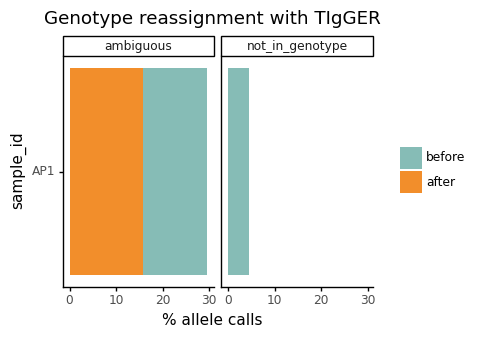

<ggplot: (1410798958565)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


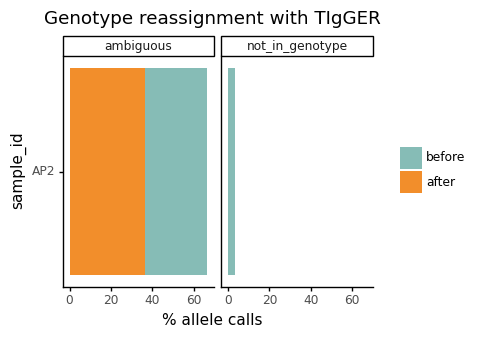

<ggplot: (1410798947261)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


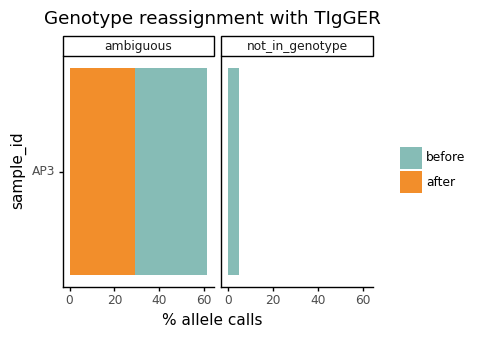

<ggplot: (1410649679853)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


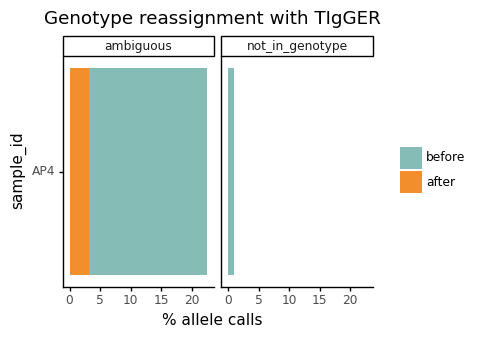

<ggplot: (1410644159293)>


Processing data file(s) : 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


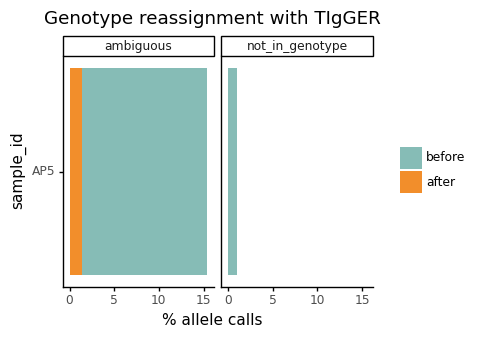

<ggplot: (1410783077013)>


Processing data file(s) : 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


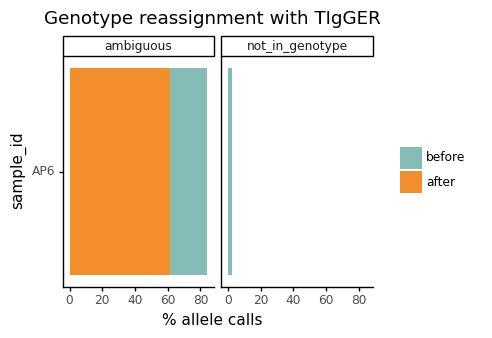

<ggplot: (1410643332657)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


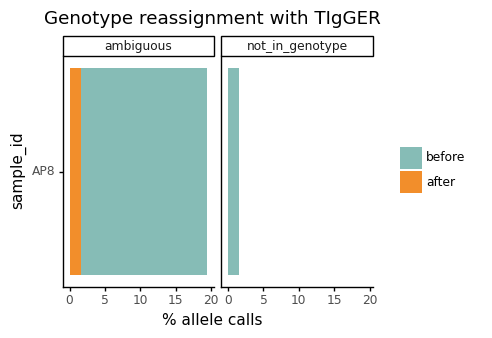

<ggplot: (1410643309173)>


Processing data file(s) : 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


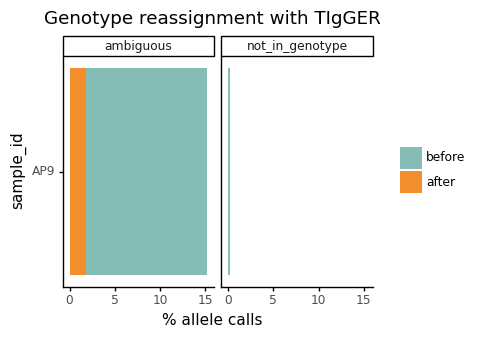

<ggplot: (1410720728309)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


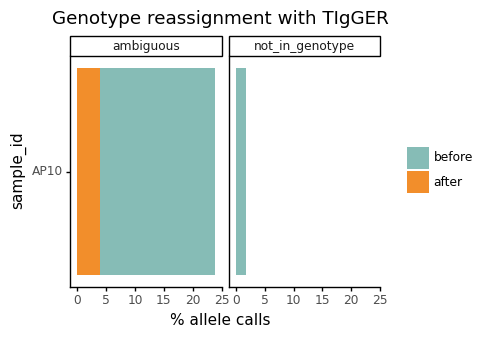

<ggplot: (1410637552173)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


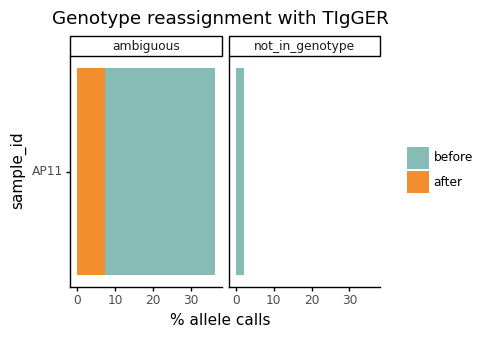

<ggplot: (1410787874757)>


Processing data file(s) : 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


      Running tigger-genotype with novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
      Novel allele discovery execution halted.
      Attempting to run tigger-genotype without novel allele discovery.
      Reassigning alleles
            Reconstructing heavy chain dmask germline sequences with v_call_genotyped.
            Reconstructing light chain dmask germline sequences with v_call.
      For convenience, entries for light chain `v_call` are copied to `v_call_genotyped`.
Returning summary plot


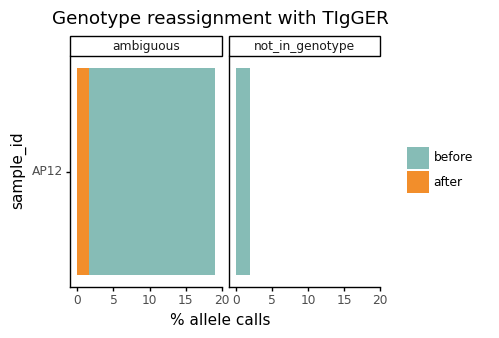

<ggplot: (1410645023449)>


Writing out to individual folders : 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


In [32]:
for folder_key, folder_value in group_dict.items():
    ddl.pp.reassign_alleles(folder_value, combined_folder = folder_key)

Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 828/828 [00:01<00:00, 445.06it/s]


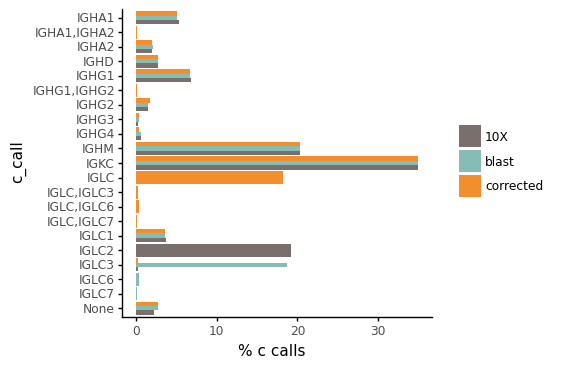

<ggplot: (1410640725041)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 463/463 [00:00<00:00, 2668.75it/s]


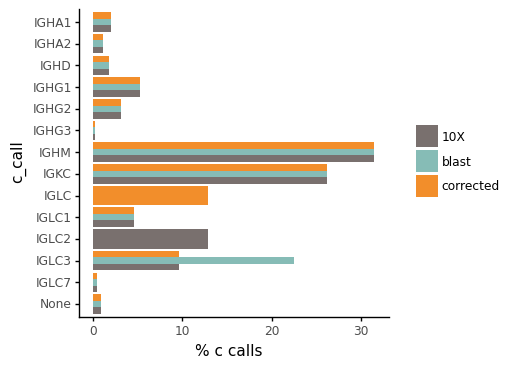

<ggplot: (1410643169221)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 1713/1713 [00:01<00:00, 1451.16it/s]


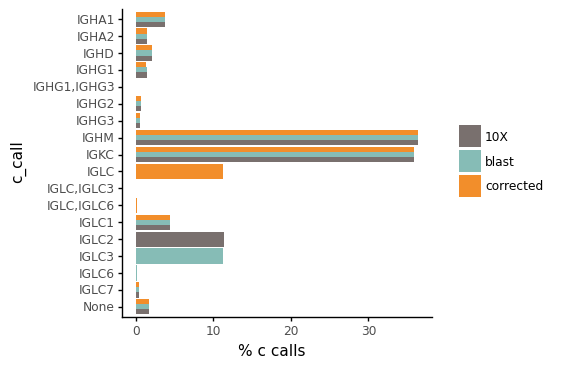

<ggplot: (1410632511069)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 4239/4239 [00:05<00:00, 710.69it/s]


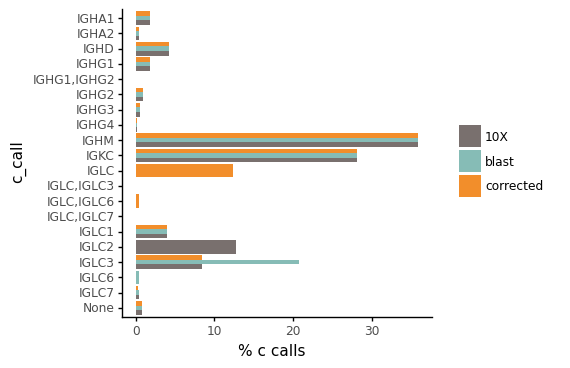

<ggplot: (1410643387165)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 4937/4937 [00:10<00:00, 489.21it/s]


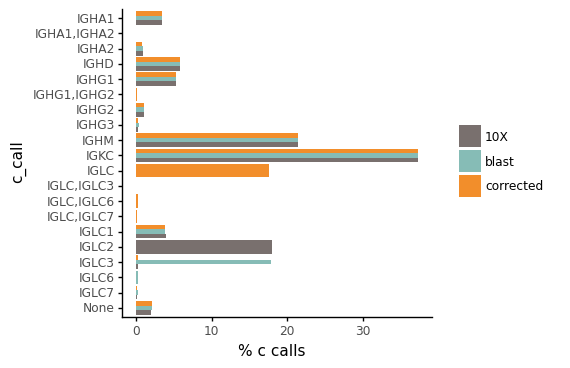

<ggplot: (1410644167153)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 588/588 [00:00<00:00, 969.02it/s] 


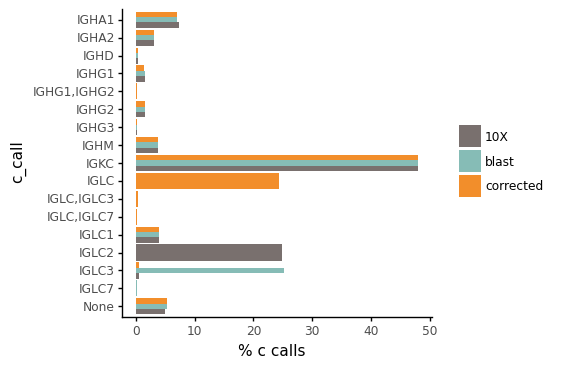

<ggplot: (1410787825861)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 6526/6526 [00:20<00:00, 317.10it/s]


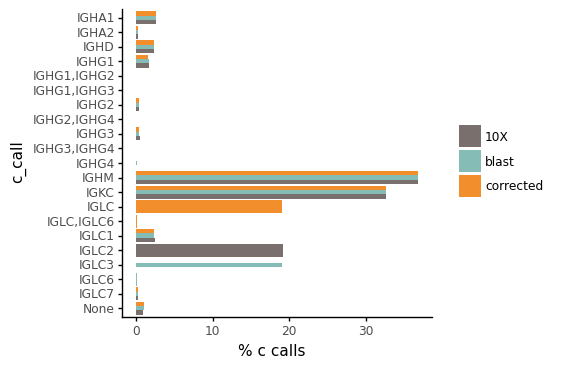

<ggplot: (1410788068133)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 1084/1084 [00:01<00:00, 795.43it/s]


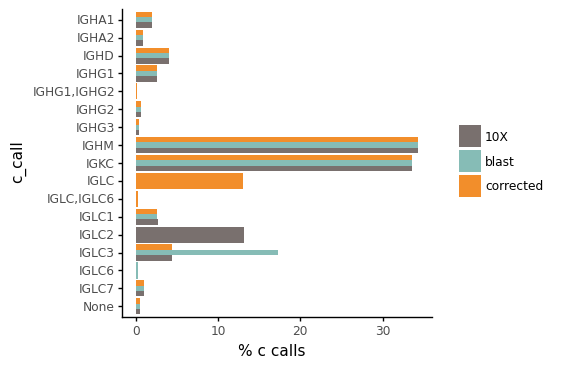

<ggplot: (1410637522757)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 1890/1890 [00:02<00:00, 691.71it/s]


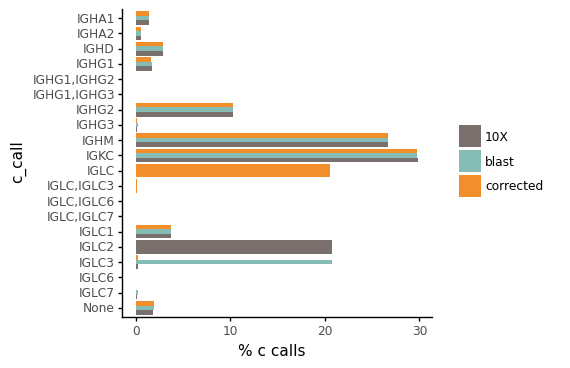

<ggplot: (1410640753249)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 1929/1929 [00:03<00:00, 521.86it/s]


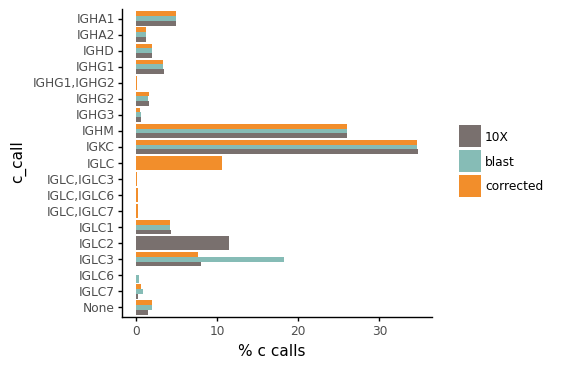

<ggplot: (1410649574005)>


Retrieving contant region calls, parallelizing with 63 cpus : 100%|██████████| 4853/4853 [00:11<00:00, 406.95it/s]


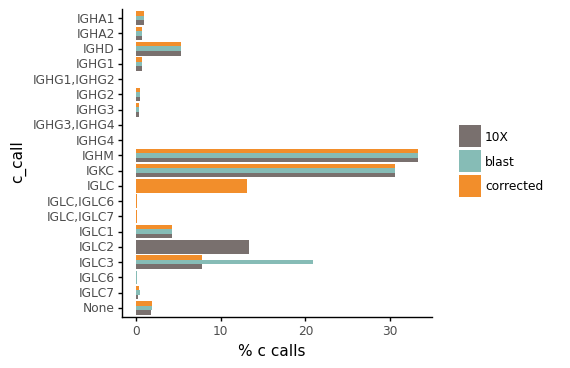

<ggplot: (1410788086269)>


In [33]:
ddl.pp.assign_isotypes(samples)

In [35]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/sanger/bcrData')
samples = ['AP1', 'AP2', 'AP3', 'AP4', 'AP5', 'AP6', 'AP8', 'AP9', 'AP10', 'AP11', 'AP12']
from tqdm import tqdm
# quantify mutations
for s in tqdm(samples, desc = 'Basic mutational load analysis '):
    filePath = s+'/dandelion/data/filtered_contig_igblast_db-pass_genotyped.tsv'
    ddl.pp.quantify_mutations(filePath)

Basic mutational load analysis : 100%|██████████| 11/11 [01:20<00:00,  7.34s/it]
